# Chapter 11: Novelty and Outlier Detection
This notebook provides practical "recipes" for outplier and novelty detection problems. Each recipe includes explanations, code examples, visualizations, best practices, and common pitfalls when applicable. 

## Getting ready
To begin, we’ll load a synthetic dataset and visualize what outliers might look like.

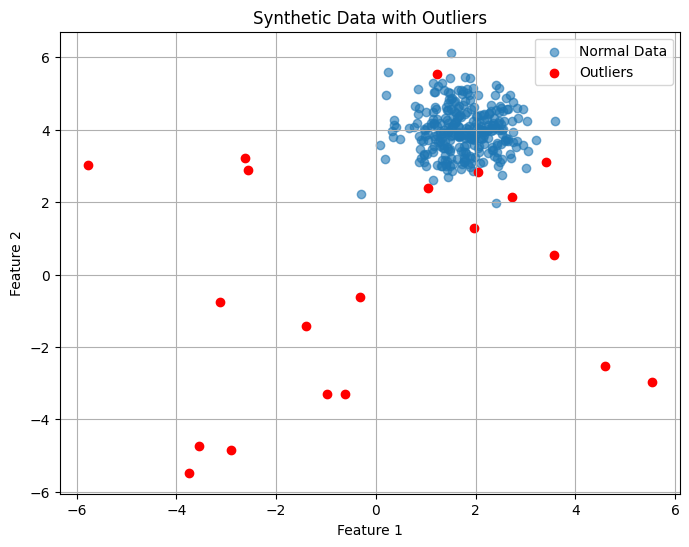

In [1]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate a synthetic dataset with intentional outliers
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.60, random_state=2024)
np.random.seed(2024)
outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
X_with_outliers = np.vstack([X, outliers])

# Visualize the data with outliers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="Normal Data", alpha=0.6)
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label="Outliers")
plt.title("Synthetic Data with Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## How to do it...
To demonstrate outlier and novelty detection techniques, we’ll use `LocalOutlierFactor()` (or LOF) from `sklearn.neighbors`. It’s an unsupervised method that detects anomalies by comparing local densities of data points.

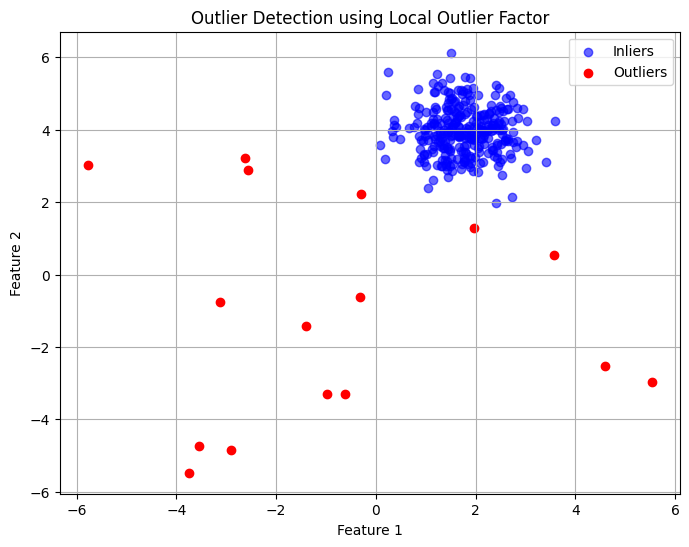

In [2]:
# Load the model
from sklearn.neighbors import LocalOutlierFactor

# Fit the model and predict outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X_with_outliers)

# Plot the predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_with_outliers[y_pred == 1, 0], X_with_outliers[y_pred == 1, 1],
            color='blue', label='Inliers', alpha=0.6)
plt.scatter(X_with_outliers[y_pred == -1, 0], X_with_outliers[y_pred == -1, 1],
            color='red', label='Outliers')
plt.title("Outlier Detection using Local Outlier Factor")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## How it works...
Outlier and novelty detection methods estimate whether each sample data point significantly deviates from the expected data distribution.

## Understanding Isolation Forest
Isolation Forest is an efficient and scalable algorithm for detecting outliers in high-dimensional datasets. Rather than profiling normal data points and identifying deviations, it works by isolating anomalies. Outliers are easier to isolate because they tend to differ significantly from most of the data. The algorithm randomly selects a feature and splits the data based on a random threshold; fewer splits are typically needed to isolate anomalies.
This method is particularly well-suited for large datasets and is capable of both outlier and novelty detection, making it a versatile tool in the machine learning toolkit.

## Getting ready
We’ll generate a synthetic dataset that includes visible outliers. This will allow us to compare the performance of Isolation Forest against the known distribution.

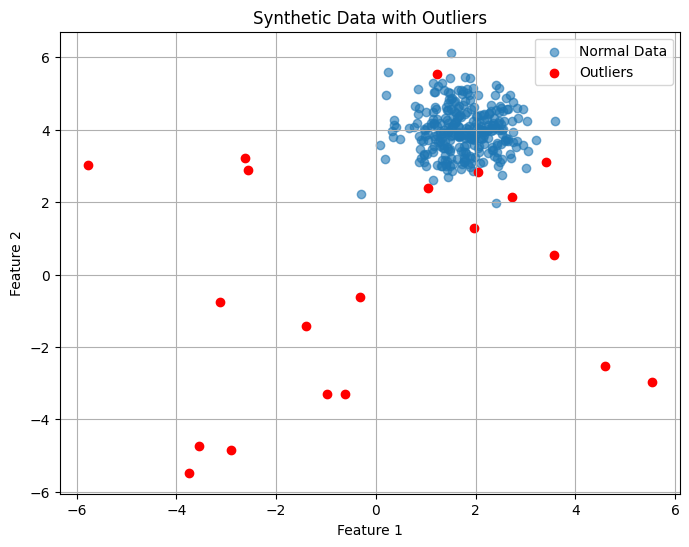

In [3]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# Generate synthetic data with outliers
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.6, random_state=2024)
np.random.seed(2024)
outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
X_combined = np.vstack([X, outliers])

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="Normal Data", alpha=0.6)
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label="Outliers")
plt.title("Synthetic Data with Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## How to do it...
We’ll use `IsolationForest()` from `sklearn.ensemble` to identify the anomalies in the dataset.

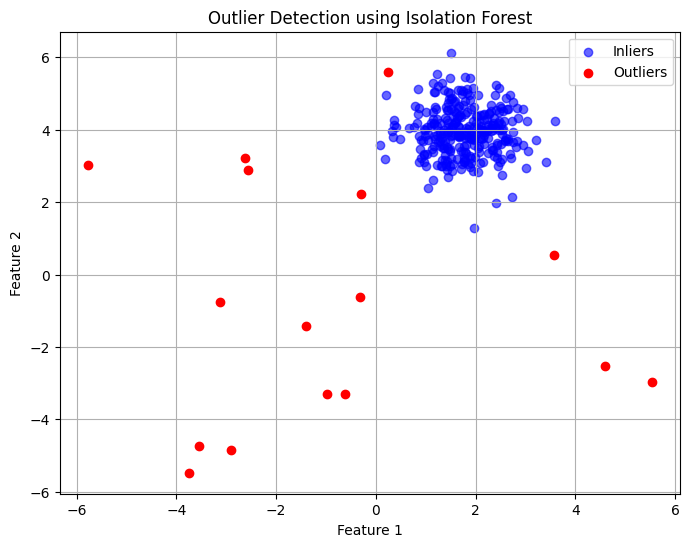

In [4]:
# Load and configure the model
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=2024)

# Fit the model and make predictions
model.fit(X_combined)
y_pred = model.predict(X_combined)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_combined[y_pred == 1, 0], X_combined[y_pred == 1, 1],
            color='blue', label='Inliers', alpha=0.6)
plt.scatter(X_combined[y_pred == -1, 0], X_combined[y_pred == -1, 1],
            color='red', label='Outliers')
plt.title("Outlier Detection using Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## How it works...
Isolation Forest isolates anomalies instead of profiling normal observations. The algorithm works as follows:
- Random Splitting: At each node, the algorithm randomly selects a feature and a split value. This continues recursively, building trees where anomalies are likely to be isolated more quickly.
- Path Length: Each point’s anomaly score is based on the average path length over all trees. Shorter paths imply a higher likelihood of being an outlier.
- Contamination: The contamination parameter determines the expected proportion of outliers in the dataset and sets a threshold for classification.
Because Isolation Forest does not rely on distance or density metrics, it performs well on high-dimensional datasets and scales efficiently with large samples.

## One-Class SVM for Novelty Detection
One-Class Support Vector Machines (One-Class SVMs) are a prevailing technique for novelty detection, particularly when we only have access to "normal" data during training. Unlike other outlier detection methods, One-Class SVM attempts to learn the boundary of normality and classifies any point lying outside this boundary as a novelty. This makes it well-suited for use cases like fraud detection, equipment failure prediction, or rare disease diagnostics—any situation where anomalous examples are extremely rare or unavailable during training.
One-Class SVM is a kernel-based method that can model nonlinear boundaries, giving it significant flexibility when separating normal instances from unseen anomalies.

## Getting ready
We’ll create a dataset with normal training data and include anomalies only at test time to demonstrate novelty detection.

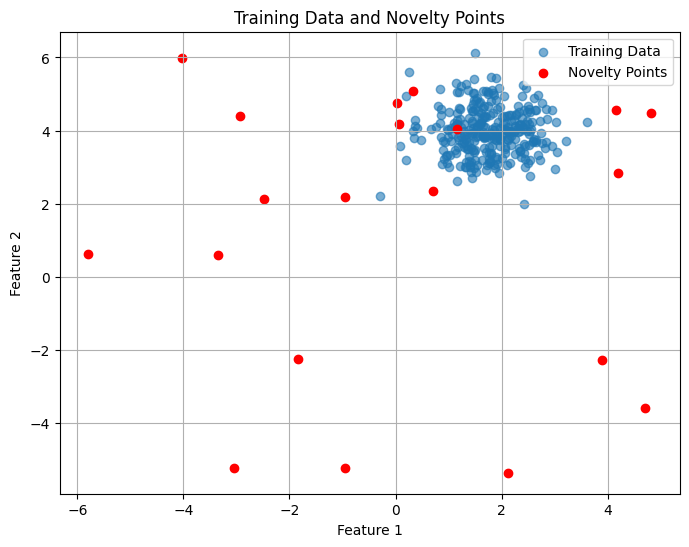

In [5]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Generate training data (normal only)
X_train, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.6, random_state=2024)

# Generate test data (normal + novelty)
X_test_normal, _ = make_blobs(n_samples=100, centers=1, cluster_std=0.6, center_box=(0, 1), random_state=42)
X_test_novelty = np.random.uniform(low=-6, high=6, size=(20, 2))
X_test = np.vstack([X_test_normal, X_test_novelty])

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], label='Training Data', alpha=0.6)
plt.scatter(X_test_novelty[:, 0], X_test_novelty[:, 1], color='red', label='Novelty Points')
plt.title("Training Data and Novelty Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## How to do it...
We’ll now use `OneClassSVM()` from `sklearn.svm` to build a novelty detector.

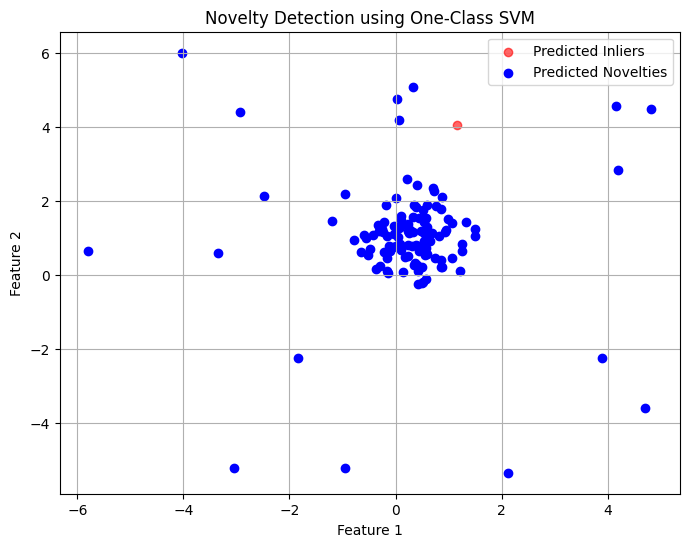

In [16]:
# Instantiate and fit the model
model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05)
model.fit(X_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot the predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], color='red', label='Predicted Inliers', alpha=0.6)
plt.scatter(X_test[y_pred == -1, 0], X_test[y_pred == -1, 1], color='blue', label='Predicted Novelties')
plt.title("Novelty Detection using One-Class SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## How it works...
One-Class SVM separates normal data from the origin in a transformed feature space using a decision function. Key parameters include:
- Kernel: One-Class SVM can use linear, polynomial, or RBF kernels. RBF is most common as it can model non-linear boundaries.
- Gamma: Defines the influence of a single training example. A low value means ‘far’ reach, high value means ‘close’ reach.
-Nu: An upper bound on the fraction of training errors and a lower bound on the fraction of support vectors. It controls the trade-off between false positives and model flexibility.
Unlike outlier detection methods that look at all data (training + test), One-Class SVM learns from normal data only and is evaluated only on new, unseen points.

## Local Outlier Factor (LOF)
Local Outlier Factor (LOF) is a density-based anomaly detection method that identifies outliers by comparing the local density of each data point to that of its neighbors. Rather than using a global threshold, LOF assesses how isolated a data point is with respect to the surrounding neighborhood. If a point lies in a region of significantly lower density than its neighbors, it is flagged as an outlier.
LOF is especially effective in datasets where the density of data points varies across the feature space. It can detect local anomalies that may be overlooked by global methods like Isolation Forest.

## Getting ready
We’ll generate a dataset containing clusters with different densities and add noise to simulate outliers.

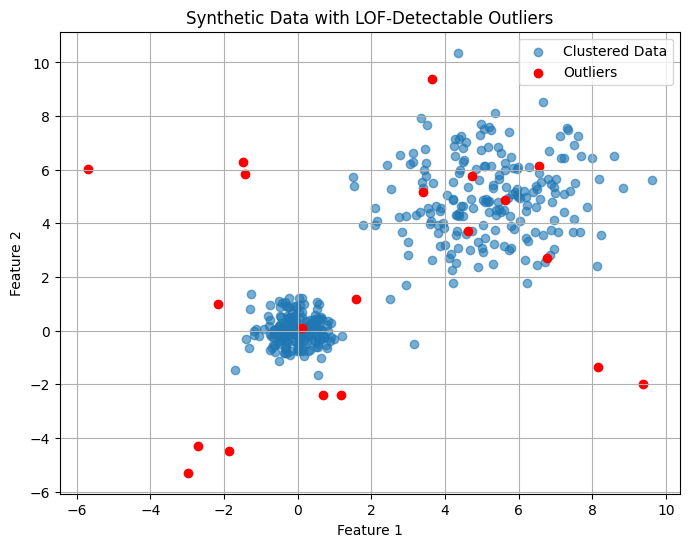

In [7]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import LocalOutlierFactor

# Create synthetic data with clusters and noise
X, _ = make_blobs(n_samples=400, centers=[[0, 0], [5, 5]], cluster_std=[0.5, 1.5], random_state=2024)
np.random.seed(2024)
outliers = np.random.uniform(low=-6, high=10, size=(20, 2))
X_with_outliers = np.vstack([X, outliers])

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="Clustered Data", alpha=0.6)
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label="Outliers")
plt.title("Synthetic Data with LOF-Detectable Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## How to do it...
We’ll apply `LocalOutlierFactor()` from `sklearn.neighbors` to identify local anomalies.

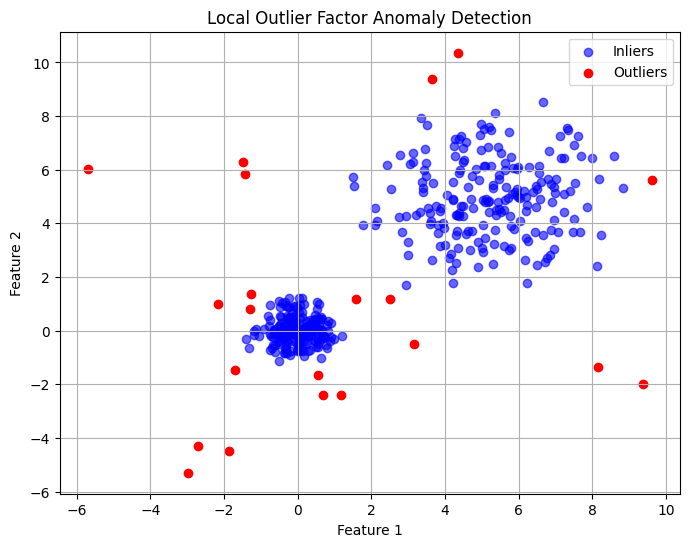

In [8]:
# Initialize and fit the model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X_with_outliers)

# Plot the predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_with_outliers[y_pred == 1, 0], X_with_outliers[y_pred == 1, 1],
            color='blue', label='Inliers', alpha=0.6)
plt.scatter(X_with_outliers[y_pred == -1, 0], X_with_outliers[y_pred == -1, 1],
            color='red', label='Outliers')
plt.title("Local Outlier Factor Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## How it works...
LOF evaluates the degree of abnormality of a data point by:
- Local Density Estimation: It computes the local density around a data point using the distance to its k-nearest neighbors (refer to Chapter 4 for a refresher).
- Reachability Distance: The reachability distance smooths distances by considering the maximum between the actual distance and the k-distance of the neighbor.
- LOF Score: A point’s LOF score is the ratio of the average local density of its neighbors to its own local density. Values much greater than 1 suggest “outlierness.”
Unlike other models, LOF does not expose a `.predict()` method for unseen data. It is strictly an unsupervised anomaly detector used at training time.

## Evaluating Outlier Detection Models
Evaluating outlier detection models is more nuanced than evaluating traditional supervised models. Outliers are typically rare, and labels may not always be available, which limits the use of standard metrics like accuracy. Instead, we use metrics suited for imbalanced datasets and binary decisions, such as precision, recall, F1-score, ROC-AUC, and confusion matrices – all of which we’ve utilized several times up to this point. When true labels are available (as in synthetic datasets), we can directly assess how our models identify anomalous points.
In this section, we’ll walk through evaluation strategies for outlier detection models using labeled data, compare model performance, and visualize the results for interpretability.

## Getting ready
We’ll generate a labeled dataset with a clear distinction between inliers and outliers.

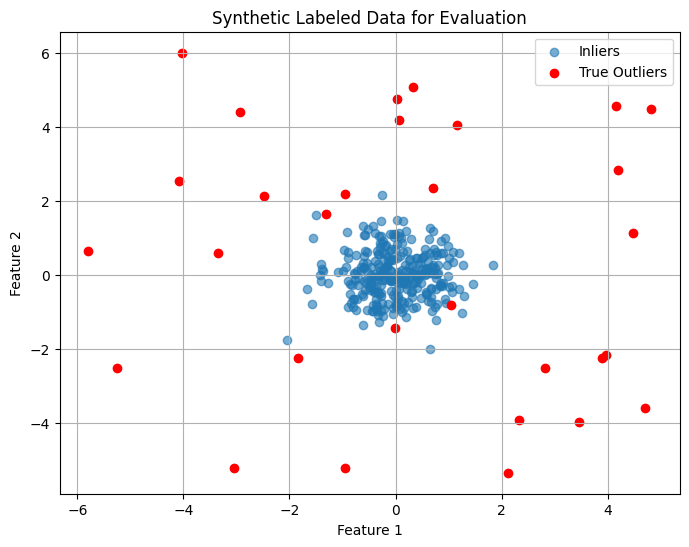

In [9]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns

# Generate labeled synthetic data
X_inliers, _ = make_blobs(n_samples=300, centers=[[0, 0]], cluster_std=0.6, random_state=2024)
X_outliers = np.random.uniform(low=-6, high=6, size=(30, 2))
X = np.vstack([X_inliers, X_outliers])
y_true = np.array([0] * len(X_inliers) + [1] * len(X_outliers))  # 0 = inlier, 1 = outlier

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y_true == 0][:, 0], X[y_true == 0][:, 1], label='Inliers', alpha=0.6)
plt.scatter(X[y_true == 1][:, 0], X[y_true == 1][:, 1], color='red', label='True Outliers')
plt.title("Synthetic Labeled Data for Evaluation")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## How to do it...
We’ll fit an Isolation Forest model and evaluate its predictions using classification metrics.

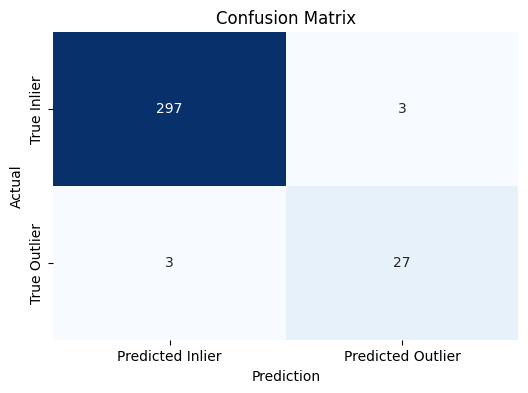

,precision,recall,f1-score,support
0,0.990,0.990,0.990,300
1,0.900,0.900,0.900,30
accuracy,0.982,0.982,0.982,1
macro avg,0.945,0.945,0.945,330
weighted avg,0.982,0.982,0.982,330


ROC-AUC Score: 0.005111111111111106


In [10]:
import pandas as pd

# Fit the model and get predictions
model = IsolationForest(contamination=0.09, random_state=2024)
model.fit(X)
y_pred = model.predict(X)
y_pred_binary = np.where(y_pred == 1, 0, 1)  # convert to 0 = inlier, 1 = outlier

# Generate and plot confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Inlier', 'Predicted Outlier'],
            yticklabels=['True Inlier', 'True Outlier'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report as a styled DataFrame and AUC
report = classification_report(y_true, y_pred_binary, output_dict=True)
report = pd.DataFrame(report).transpose()
styled_report = (report
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}',
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)
display(styled_report)
print("ROC-AUC Score:", roc_auc_score(y_true, model.decision_function(X)))


## How it works...
Each metric offers a unique view of model performance:
- Precision: The proportion of predicted outliers that are actually true outliers. High precision indicates fewer false positives.
- Recall: The proportion of actual outliers that are correctly identified. High recall means fewer false negatives.
- F1-Score: The harmonic mean of precision and recall. A balanced measure when dealing with class imbalance.
- Confusion Matrix: Offers detailed insight into prediction distribution.
- ROC-AUC Score: Measures the model’s ability to rank true outliers above inliers.
When class labels are not available (which is common), model evaluation may rely on expert validation, reconstruction error (e.g., for autoencoders), or proxy metrics like prediction stability.

## Handling Detected Outliers
Once outliers have been identified, we face an important decision: how should we handle them? The appropriate strategy depends on the context of the problem and the nature of the data. Outliers can be informative (e.g., fraud cases) or disruptive (e.g., sensor glitches) and choosing how to treat them affects model performance and interpretability.
This section outlines common strategies for handling outliers, including removal, transformation, imputation, and retaining them for specialized modeling. We’ll walk through practical code examples to demonstrate each approach.

## Getting ready
We’ll use a dataset that includes outliers detected via the Isolation Forest method.

In [11]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# Generate the dataset
X_inliers, _ = make_blobs(n_samples=300, centers=[[0, 0]], cluster_std=0.6, random_state=2024)
X_outliers = np.random.uniform(low=-6, high=6, size=(30, 2))
X = np.vstack([X_inliers, X_outliers])

#  Detect outliers using Isolation Forest
model = IsolationForest(contamination=0.09, random_state=2024)
model.fit(X)
outlier_mask = model.predict(X) == -1

## How to do it...
We’ll now explore different strategies for handling the detected outliers.

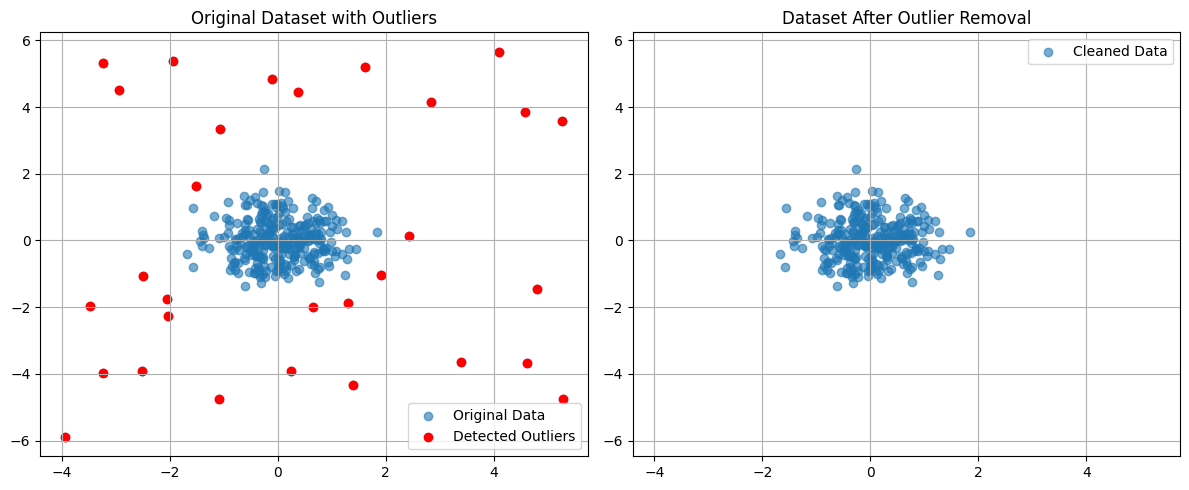

In [ ]:
# Remove outliers from the dataset
X_cleaned = X[~outlier_mask]

# Replace outliers with the feature-wise median
X_replaced = X.copy()
median_vals = np.median(X[~outlier_mask], axis=0)
X_replaced[outlier_mask] = median_vals

# Cap outliers to specified bounds (winsorization)
X_df = pd.DataFrame(X, columns=['feature1', 'feature2'])
X_capped = X_df.copy()
for col in X_df.columns:
    lower = X_df[col].quantile(0.05)
    upper = X_df[col].quantile(0.95)
    X_capped[col] = X_df[col].clip(lower=lower, upper=upper)

# Visualize original and cleaned datasets with matched axes
plt.figure(figsize=(12, 5))

ax1 = plt.subplot(1, 2, 1)
ax1.scatter(X[:, 0], X[:, 1], label='Original Data', alpha=0.6)
ax1.scatter(X[outlier_mask][:, 0], X[outlier_mask][:, 1], color='red', label='Detected Outliers')
ax1.set_title('Original Dataset with Outliers')
ax1.legend()
ax1.grid(True)

ax2 = plt.subplot(1, 2, 2)
ax2.scatter(X_cleaned[:, 0], X_cleaned[:, 1], label='Cleaned Data', alpha=0.6)
ax2.set_title('Dataset After Outlier Removal')
ax2.legend()
ax2.grid(True)

ax2.set_xlim(ax1.get_xlim())
ax2.set_ylim(ax1.get_ylim())

plt.tight_layout()
plt.show()

## How it works...
The choice of strategy depends on the underlying assumptions and the impact of outliers on model accuracy:
- Removal: Appropriate when outliers result from noise, errors, or corrupted records. However, excessive removal may discard useful signal.
- Replacement: Replaces outliers with the mean, median, or another central statistic. This preserves dataset size but may introduce bias.
- Capping (Winsorization): Restricts values to a specific range. Useful when values should fall within bounds but still retain ordering.
- Flagging: Outliers can also be retained but flagged as a new feature, allowing models to learn behavior differences.

## Choosing the Right Detection Technique
With multiple approaches to outlier and novelty detection available in scikit-learn, selecting the right method depends on the nature of your dataset, the presence or absence of labels, and the use case. In this section, we’ll compare the key characteristics of various detection algorithms covered in this chapter and provide practical guidance to help you determine which approach best suits your needs.
We'll explore decision criteria including assumptions about the data distribution, scalability, dimensionality, interpretability, and whether the model supports predictions on new, unseen data.

## Getting ready
We’ll summarize our experimental setup and reuse model evaluation results from earlier sections. (NOTE: This part is really OPTIONAL)

In [13]:
# Load the libraries
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Create a comparison table of methods
data = {
    "Algorithm": ["Isolation Forest", "Local Outlier Factor", "One-Class SVM"],
    "Handles High Dimensions": ["Yes", "No", "Sometimes"],
    "Learns From Unlabeled Data": ["Yes", "Yes", "No (novelty only)"],
    "Supports New Predictions": ["Yes", "No", "Yes"],
    "Scales to Large Data": ["Yes", "No", "No"],
    "Robust to Varying Densities": ["No", "Yes", "Partially"],
    "Main Strength": [
        "Fast, scalable, easy to use",
        "Detects local anomalies in varying densities",
        "Kernel-based boundary modeling"
    ]
}

summary_df = pd.DataFrame(data)
summary_df.set_index("Algorithm", inplace=True)
summary_df

,Handles High Dimensions,Learns From Unlabeled Data,Supports New Predictions,Scales to Large Data,Robust to Varying Densities,Main Strength
Algorithm,,,,,,
Isolation Forest,Yes,Yes,Yes,Yes,No,"Fast, scalable, easy to use"
Local Outlier Factor,No,Yes,No,No,Yes,Detects local anomalies in varying densities
One-Class SVM,Sometimes,No (novelty only),Yes,No,Partially,Kernel-based boundary modeling


## How to do it...
We’ll walk through example-driven decision criteria to choose the right method.

In [14]:
# If your data is large and high-dimensional, consider:
# Isolation Forest is preferred
model = IsolationForest(contamination=0.1, random_state=2024)

#If your data has clusters with varying densities:
# Local Outlier Factor is better suited
model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# If you want to train on only normal data and detect novel data points later:
# One-Class SVM enables novelty detection
model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.1)

## How it works...
Each algorithm has its strengths and limitations:
- Isolation Forest: Ideal for general-purpose outlier detection with large, high-dimensional datasets. It isolates anomalies quickly but may underperform with varying density regions.
- Local Outlier Factor (LOF): Detects local deviations, making it powerful in non-uniform data. However, it cannot make predictions on unseen data.
- One-Class SVM: Suited for novelty detection where only normal data is available during training. It can be computationally expensive on large datasets and is sensitive to feature scaling.
When in doubt, start with Isolation Forest for efficiency and iterate based on domain-specific needs.

## Practical Exercises in Novelty and Outlier Detection
In this final section, we’ll engage in practical exercises that involve detecting, evaluating, and handling anomalies in real-world datasets. These exercises are designed to reinforce the concepts introduced throughout the chapter—ranging from model selection to evaluation and strategy implementation. By the end of this section, you’ll have direct experience working with a variety of detection methods and be better equipped to select and fine-tune them based on your data and goals.

### Exercise 1: Applying Isolation Forest to a Real-World Dataset
In this exercise, we’ll detect outliers in a credit card transaction dataset using the Isolation Forest algorithm.

### Implementation Steps:

In [15]:
# Load libraries
YOUR CODE HERE

# Generate synthetic data with inliers and outliers
YOUR CODE HERE

# Scale the data
YOUR CODE HERE

# Apply Isolation Forest
YOUR CODE HERE

# Evaluate the results
YOUR CODE HERE

# Print classification report as a styled DataFrame
YOUR CODE HERE

SyntaxError: invalid syntax (3372626896.py, line 2)

### Exercise 2: Using LOF on a Network Intrusion Dataset
In this task, we simulate an imbalanced network-like dataset with several clusters and injected noise. You'll apply the Local Outlier Factor algorithm to identify low-density regions where anomalous behavior might occur. Finally, you'll evaluate model performance using a confusion matrix and classification metrics.

### Implementation Steps:

In [ ]:
# Load libraries
YOUR CODE HERE

# Generate clustered data with synthetic noise
YOUR CODE HERE

# Scale the data
YOUR CODE HERE

# Apply Local Outlier Factor
YOUR CODE HERE

# Evaluate the predictions
YOUR CODE HERE

### Exercise 3: One-Class SVM for Manufacturing Sensor Data
This exercise demonstrates novelty detection in a simulated manufacturing environment. You’ll train a model only on normal operational data, then use it to detect novel observations from a mix of normal and abnormal test data. Finally, you’ll visualize the inliers and detected novelties in 2D feature space.

### Implementation Steps:

In [ ]:
# Load libraries
YOUR CODE HERE

# Generate normal and novel data
YOUR CODE HERE

# Fit One-Class SVM on normal data
YOUR CODE HERE

# Visualize predictions
YOUR CODE HERE